## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

### 2. Load the dataset and display a sample of five rows of the data frame.

In [2]:
dataset = pd.read_csv("heart.csv")
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [3]:
dataset.shape

(319795, 18)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [5]:
dataset.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [6]:
print('Columns HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer  are categorical data, hence no Mean or Standard deviation found.')
print('Whereas columns BMI, PhysicalHealth, MentalHealth, sleep time are continuous data with Mean and Standard Deviation')

Columns HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer  are categorical data, hence no Mean or Standard deviation found.
Whereas columns BMI, PhysicalHealth, MentalHealth, sleep time are continuous data with Mean and Standard Deviation


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [7]:
dataset.isnull().mean() * 100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [8]:
new_dataset = dataset.drop_duplicates()
new_dataset.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

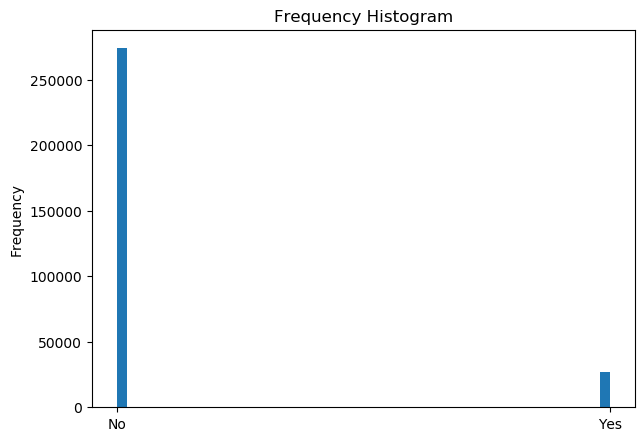

In [9]:
data = new_dataset['HeartDisease']
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(data, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

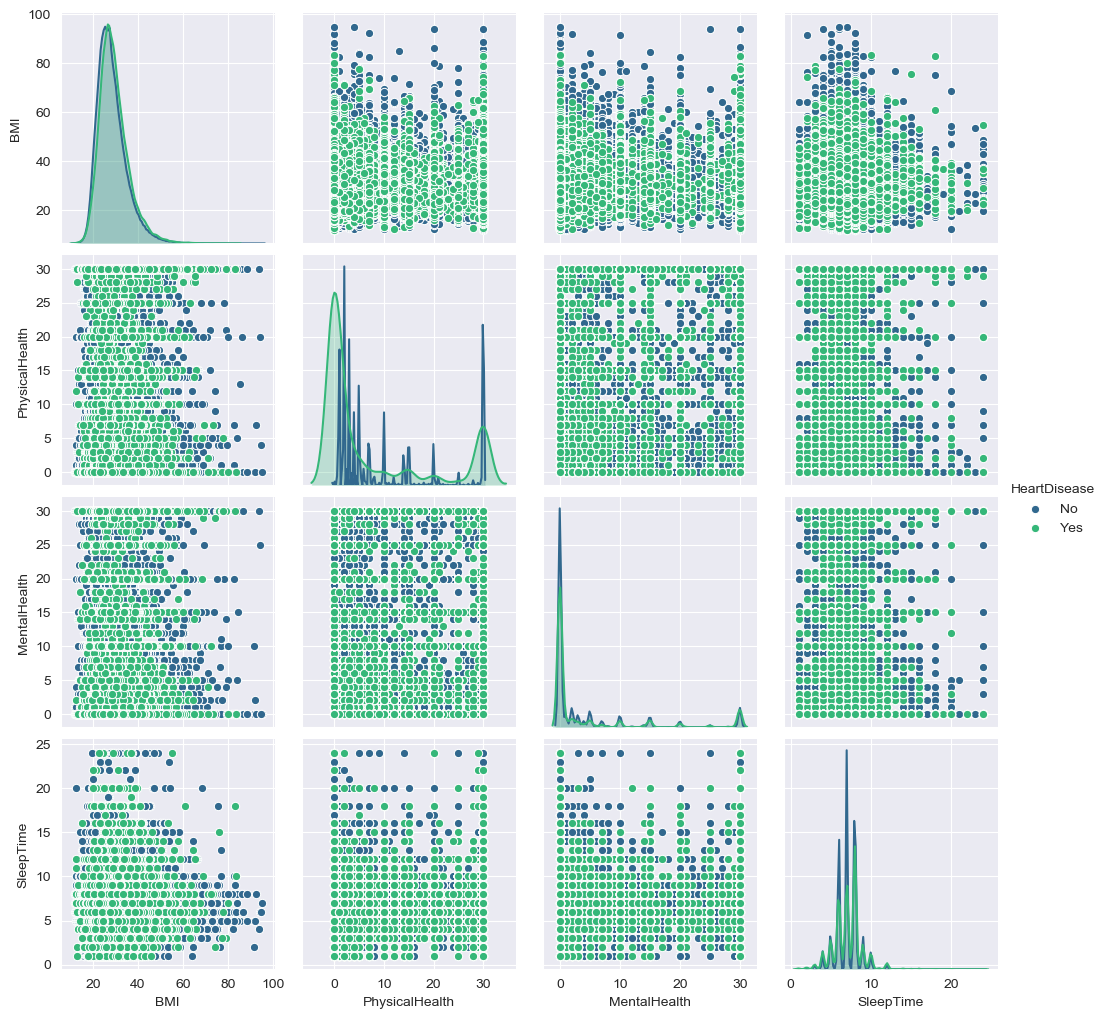

In [10]:
sns.set_style("darkgrid")
sns.pairplot(data = new_dataset, hue = "HeartDisease",palette = "viridis")

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [11]:
print(new_dataset.Diabetic.unique())

new_dataset.loc[new_dataset["Diabetic"] == "Yes (during pregnancy)", "Diabetic"] = 'Yes'
new_dataset.loc[new_dataset["Diabetic"] == "No, borderline diabetes", "Diabetic"] = 'No'

print(new_dataset.Diabetic.unique())

['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']


F:\Conda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [12]:
print(new_dataset.HeartDisease.unique())

new_dataset.loc[new_dataset["HeartDisease"] == "Yes", "HeartDisease"] = 1
new_dataset.loc[new_dataset["HeartDisease"] == "No", "HeartDisease"] = 0

print(new_dataset.HeartDisease.unique())

['No' 'Yes']
[0 1]


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [38]:
label_encoder = preprocessing.LabelEncoder()

new_dataset['AgeCategory']= label_encoder.fit_transform(new_dataset['AgeCategory']).astype('int')
new_dataset['Race']= label_encoder.fit_transform(new_dataset['Race']).astype('int')
new_dataset['GenHealth']= label_encoder.fit_transform(new_dataset['GenHealth']).astype('int')

new_dataset['Smoking'] = pd.get_dummies(new_dataset['Smoking']).astype('int')
new_dataset['AlcoholDrinking'] = pd.get_dummies(new_dataset['AlcoholDrinking']).astype('int')
new_dataset['Stroke'] = pd.get_dummies(new_dataset['Stroke']).astype('int')
new_dataset['DiffWalking'] = pd.get_dummies(new_dataset['DiffWalking']).astype('int')
new_dataset['Sex'] = pd.get_dummies(new_dataset['Sex']).astype('int')
new_dataset['PhysicalActivity'] = pd.get_dummies(new_dataset['PhysicalActivity']).astype('int')
new_dataset['Asthma'] = pd.get_dummies(new_dataset['Asthma']).astype('int')
new_dataset['KidneyDisease'] = pd.get_dummies(new_dataset['KidneyDisease']).astype('int')
new_dataset['SkinCancer'] = pd.get_dummies(new_dataset['SkinCancer']).astype('int')
new_dataset['Diabetic'] = pd.get_dummies(new_dataset['Diabetic']).astype('int')

F:\Conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
F:\Conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [39]:
x = new_dataset.drop("HeartDisease", axis = 1)
y = new_dataset["HeartDisease"]

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [40]:
x_test,x_train,y_test,y_train = train_test_split(x, y, test_size=0.3, random_state=106)

In [41]:
print('x test', x_test.shape)
print('x train', x_train.shape)

print('y test', y_test.shape)
print('y train', y_train.shape)

x test (211201, 17)
x train (90516, 17)
y test (211201,)
y train (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [46]:
scaler = preprocessing.StandardScaler()
scaled_xtrain_data = scaler.fit_transform(x_train).astype('int')
scaled_xtest_data = scaler.fit_transform(x_test).astype('int')

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [64]:
class Main():
    def train_model(self, model, train_x_set, train_y_set):
        self.trained_model = model.fit(train_x_set, train_y_set)
        self.accuracy_score = model.score(train_x_set, train_y_set)
        
    def get_accuracy(self):
        return self.accuracy_score
    
    def predict(self, test_data):
        return self.trained_model.predict(test_data)

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

m = Main()
m.train_model(RandomForestClassifier(), scaled_xtrain_data, list(y_train))
accuracy = m.get_accuracy()
print(accuracy)

m.predict(scaled_xtest_data)

0.9431039816165098


array([0, 0, 0, ..., 0, 0, 0])

### Conclusion

----
## Happy Learning:)
----